In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

C:\Users\heyda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#modul metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [4]:
#cross validation
from sklearn.model_selection import train_test_split

In [5]:
#upload data
rawData = pd.read_csv('newdf.csv', header=0)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,1,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,1,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,2,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,3,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#check the levels and customer number in each of these levels
rawData.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [8]:
dummiesDF=pd.get_dummies(rawData, columns=["AGE", "MARRIAGE",'EDUCATION','SEX','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], prefix=["age", "marriage",'EDUCATION','SEX','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
dummiesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 96 columns):
LIMIT_BAL                     30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
default payment next month    30000 non-null int64
age_0                         30000 non-null uint8
age_1                         30000 non-null uint8
age_2                         30000 non-null uint8
age_3                   

In [9]:
dummiesDF.head(10)

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,3913,3102,689,0,0,0,0,689,0,...,1,0,0,0,0,0,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,1,0,0,0,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,1,0,0,0,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,1,0,0,0,0,0,0,0
5,50000,64400,57069,57608,19394,19619,20024,2500,1815,657,...,0,0,1,0,0,0,0,0,0,0
6,500000,367965,412023,445007,542653,483003,473944,55000,40000,38000,...,0,0,1,0,0,0,0,0,0,0
7,100000,11876,380,601,221,-159,567,380,601,0,...,0,1,0,0,0,0,0,0,0,0
8,140000,11285,14096,12108,12211,11793,3719,3329,0,432,...,0,0,1,0,0,0,0,0,0,0
9,20000,0,0,0,0,13007,13912,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
dummiesDF.describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,...,0.163167,0.191333,0.542867,0.092200,0.006133,0.001633,0.000433,0.000633,0.001533,0.000067
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,...,0.369524,0.393357,0.498167,0.289313,0.078076,0.040382,0.020812,0.025159,0.039128,0.008165
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
cols = dummiesDF.columns.tolist()
cols
cols.insert(0, cols.pop(cols.index('default payment next month')))
cols
dummiesDF = dummiesDF.reindex(columns= cols)

In [12]:
dummiesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 96 columns):
default payment next month    30000 non-null int64
LIMIT_BAL                     30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                      30000 non-null int64
PAY_AMT4                      30000 non-null int64
PAY_AMT5                      30000 non-null int64
PAY_AMT6                      30000 non-null int64
age_0                         30000 non-null uint8
age_1                         30000 non-null uint8
age_2                         30000 non-null uint8
age_3                   

In [13]:
#define the features(x_values)
features=dummiesDF.iloc[:,1:96]
print('Summary of feature sample')
features.head(11)

Summary of feature sample


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,3913,3102,689,0,0,0,0,689,0,...,1,0,0,0,0,0,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,1,0,0,0,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,1,0,0,0,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,1,0,0,0,0,0,0,0
5,50000,64400,57069,57608,19394,19619,20024,2500,1815,657,...,0,0,1,0,0,0,0,0,0,0
6,500000,367965,412023,445007,542653,483003,473944,55000,40000,38000,...,0,0,1,0,0,0,0,0,0,0
7,100000,11876,380,601,221,-159,567,380,601,0,...,0,1,0,0,0,0,0,0,0,0
8,140000,11285,14096,12108,12211,11793,3719,3329,0,432,...,0,0,1,0,0,0,0,0,0,0
9,20000,0,0,0,0,13007,13912,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
#define the dependent variable(y_value)
depVar = dummiesDF.iloc[:,0]
print('Summary of dependent sample')
depVar.head()

Summary of dependent sample


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [15]:
#Training Set (Feature Space: X Training)
X_train=features[:21000]
X_train_count=len(X_train.index)
X_train.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,3913,3102,689,0,0,0,0,689,0,...,1,0,0,0,0,0,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,...,0,0,1,0,0,0,0,0,0,0
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,...,0,0,1,0,0,0,0,0,0,0
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,...,0,0,1,0,0,0,0,0,0,0


In [16]:
#Dependent Variable Training Set (y Training)
y_train = depVar[:21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head(15)

The number of observations in the Y training set are: 21000


0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: default payment next month, dtype: int64

In [17]:
#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
21000      30000          0        780          0       1170        780   
21001     280000     178220     184848     188411     191291     189029   
21002     260000     128602     118109      21557      23186      14117   
21003     200000     160106     162743      81890          0          0   
21004      80000      79237      65301      67253      67352      74448   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   ...     PAY_6_-2  PAY_6_-1  \
21000          0       780         0      1170   ...            0         0   
21001     192023     10000      9000      8000   ...            0         0   
21002      15797      3203      6015      5055   ...            0         0   
21003          0      7600      4000         0   ...            1         0   
21004      72928      3000      4005      2500   ...            0         0   

       PAY_

In [18]:
#Dependent variable Testing set (y testing-ground trust)
y_test = depVar[-9000:]
y_test_count=len(y_test.index)
print('The number of observations in the Y testing set are:',str(y_test_count))
print(y_test.head(8))

The number of observations in the Y testing set are: 9000
21000    0
21001    1
21002    0
21003    1
21004    1
21005    0
21006    0
21007    1
Name: default payment next month, dtype: int64


In [19]:
#apply cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((15750, 95), (15750,), (5250, 95), (5250,))

In [21]:
#create the objects for models and define the parameters
modelRF=RandomForestClassifier(n_estimators=150, max_features='auto')
modelKNN=KNeighborsClassifier(n_neighbors=6)
modelSVM=SVC(kernel='linear',C=0.1)

In [22]:
#train the Random Forest
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
#get the training score
print(cross_val_score(modelRF, X_train, y_train))
accuracy = modelRF.score(X_train,y_train)
print('Accuracy of Random Forest is:',str(accuracy))


[0.81409524 0.80514286 0.81104762]
Accuracy of Random Forest is: 0.9975238095238095


In [25]:
#score the importancy of the features
importance= modelRF.feature_importances_
importance

array([6.53826635e-02, 5.71752641e-02, 5.27880825e-02, 5.02700915e-02,
       5.01510231e-02, 4.92101384e-02, 4.89811781e-02, 4.93130626e-02,
       4.65175472e-02, 4.46572532e-02, 4.22056585e-02, 4.20836386e-02,
       4.52127431e-02, 7.45597906e-03, 1.06237089e-02, 1.02069252e-02,
       5.76869285e-03, 5.17085037e-04, 7.77568029e-05, 1.00424602e-02,
       1.01770063e-02, 1.33345726e-03, 2.66646851e-05, 9.87366315e-03,
       1.08324195e-02, 8.84810533e-03, 2.26171995e-04, 7.42497085e-04,
       6.82464416e-05, 1.02280915e-02, 9.87728707e-03, 3.35009014e-03,
       5.43729933e-03, 1.80721182e-02, 8.18589427e-03, 5.73178996e-02,
       3.87061648e-03, 6.63909743e-04, 9.40262638e-05, 8.08416540e-05,
       6.37005675e-05, 4.72911745e-05, 2.28665350e-03, 4.95425125e-03,
       6.23042759e-03, 5.12315069e-05, 2.69776023e-02, 2.40692458e-03,
       5.02209600e-04, 1.81148034e-04, 5.84076435e-05, 4.38471250e-05,
       0.00000000e+00, 2.22806394e-03, 4.63829547e-03, 5.62131434e-03,
      

In [24]:
# Print the name and gini importance of each feature
for feature in zip(cols, importance):
    print(feature)

('default payment next month', 0.06446337499162356)
('LIMIT_BAL', 0.05686039254104561)
('BILL_AMT1', 0.053005060345783665)
('BILL_AMT2', 0.051150683306995244)
('BILL_AMT3', 0.05032968611449168)
('BILL_AMT4', 0.04837534172550064)
('BILL_AMT5', 0.04891856982026293)
('BILL_AMT6', 0.04963729160196922)
('PAY_AMT1', 0.047140072912766146)
('PAY_AMT2', 0.04445982920210365)
('PAY_AMT3', 0.04205734789155954)
('PAY_AMT4', 0.04229301628045562)
('PAY_AMT5', 0.0444891420342612)
('PAY_AMT6', 0.007129825401328026)
('age_0', 0.010573550705748346)
('age_1', 0.01057749235426738)
('age_2', 0.006321218052080772)
('age_3', 0.0007351537169507181)
('age_4', 0.0001527209760364824)
('marriage_0', 0.010085770211016051)
('marriage_1', 0.010086082541956691)
('marriage_2', 0.0016154355688303393)
('marriage_3', 1.1255680458969558e-05)
('EDUCATION_0', 0.009639275265958258)
('EDUCATION_1', 0.011043739958945769)
('EDUCATION_2', 0.00842127490392282)
('EDUCATION_3', 0.00018325158312623463)
('EDUCATION_4', 0.0006661492220

<BarContainer object of 95 artists>

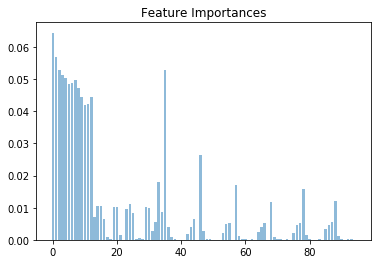

In [25]:
#plot the importancy of the features
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importance,
        align='center',
        alpha=0.5)

First 20 attributes were most impotant ones

In [39]:
#train the support vector classifier
modelSVM.fit(X_train,y_train)
print(cross_val_score(modelSVM, X_train,y_train))
accuracySVM=modelSVM.score(X_train, y_train)
print('Accuracy of Support Vector Machine is:',str(accuracySVM))

[0.76514286 0.77371429 0.77028571]
Accuracy of Support Vector Machine is: 0.7720634920634921


In [26]:
#train the KNeighbors Classifier
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [27]:
#get the training score of KNC
print(cross_val_score(modelKNN, X_train, y_train))
accuracyKNN = modelKNN.score(X_train, y_train)
print('Accuracy of KNN is:',str(accuracyKNN))

[0.76266667 0.76361905 0.76038095]
Accuracy of KNN is: 0.7976507936507936


In [28]:
#making the prediction with Random Forest
prediction=modelRF.predict(X_test)

In [29]:
predaccuracy = accuracy_score(y_test,prediction)
print('Accuracy: %.3f' % predaccuracy)

Accuracy: 0.810


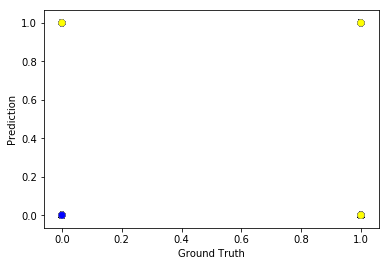

In [30]:
plt.scatter(y_test, prediction, color=['blue','yellow'])
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

In [31]:
from sklearn.feature_selection import RFECV

In [32]:
m=RFECV(RandomForestClassifier(),scoring='accuracy')
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.9766984126984127

In [33]:
# Create a selector object that will use the random forest classifier to identify
#features that have an importance of more than median number
from sklearn.feature_selection import SelectFromModel
select=SelectFromModel(RandomForestClassifier(n_estimators=150,random_state=40, max_features='auto'),threshold='median')
select.fit(X_train,y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='median')

In [34]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_train_s = select.transform(X_train)
X_test_s= select.transform(X_test)
print('The shape of X_train is:',X_train.shape)
print('The shape of X_train_s is:',X_train_s.shape)
print('The shape of X_test is:',X_train.shape)
print('The shape of X_test_s is:',X_test_s.shape)

The shape of X_train is: (15750, 95)
The shape of X_train_s is: (15750, 48)
The shape of X_test is: (15750, 95)
The shape of X_test_s is: (5250, 48)


In [35]:
# Create a new random forest classifier for the most important features
modelRF_important = RandomForestClassifier(n_estimators=150, random_state=40)

# Train the new classifier on the new dataset containing the most important features
modelRF_important.fit(X_train_s, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [36]:
#get the training score
print(cross_val_score(modelRF_important, X_train_s, y_train))
accuracy_important = modelRF_important.score(X_train_s,y_train)
print('Accuracy of Random Forest with important features is:',str(accuracy_important))

[0.81352381 0.80895238 0.81219048]
Accuracy of Random Forest with important features is: 0.9975238095238095


In [37]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = modelRF_important.predict(X_test_s)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.8108571428571428

Our original and Limited model contained almost same number of accuracy. In original model which contained all the features the accurate was 81.3%, while the our ‘limited’ model which contained only important features the accuracy was 81.1%.

In [38]:
from sklearn.feature_selection import RFE

# create the RFE model and select 3 attributes
rfe = RFE(modelRF, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[ 8  1  1  3  1  6  2  4  7  9 11 12 10 30 22 21 33 55 70 25 18 51 86 24
 20 28 66 56 67 27 17 44 31 16 26  5 41 57 75 82 81 76 49 38 29 80 13 46
 61 69 73 79 93 45 39 36 85 14 54 63 72 77 71 92 47 42 34 87 19 53 58 68
 84 59 90 48 40 37 15 50 60 78 89 62 91 43 35 32 23 52 64 83 74 65 88]
